# Q2 Regression analysis:

In [11]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

#### Let's load the data and look at the first 15 rows

In [12]:
df = pd.read_csv("Comp1_IE529.csv", header  = None)
df.head(15)

,0,1
0,37.5,6.4
1,51.5,10.2
2,61.3,12.4
3,61.3,13.0
4,63.6,13.2
5,66.1,13.0
6,70.0,12.7
7,92.7,13.9
8,90.5,15.5
9,90.5,15.8


In [13]:
X = np.array(df)
X = np.insert(X, 0, 1, axis=1)   #Inserting a column of 1s so that we can model a simple linear regression

## Lets begin by fitting a simple linear regression model to our data \begin{align}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x
\end{align} 
#### We will use statsmodel.api library in python and call the OLS function which stands for ordinary least squares to fit a simple linear regression model to our data with minimum sum of squared errors

In [14]:
model = sm.OLS(X[:,2],X[:,:2]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     294.9
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           7.76e-25
Time:                        11:08:52   Log-Likelihood:                -101.07
No. Observations:                  62   AIC:                             206.1
Df Residuals:                      60   BIC:                             210.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6796      0.580      9.784      0.000       4.518       6.841
x1             0.0995      0.006     17.174      0.000       0.088       0.111
==============================================================================
Omnibus:                        1.396   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.300
Skew:                          -0.219   Prob(JB):                        0.522
Kurtosis:                       2.443   Cond. No.                         365.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The coefficients obtained are \begin{align}
\hat{\beta_0} = 5.6796 \\
\hat{\beta_1} = 0.0995
\end{align} 
### Lets now see what the sum of squared error is for this model 

In [15]:
ssr =[]
ssr.append(model.ssr)
print('\033[1m'+ 'Sum of squared residuals= ' + '\033[0m',model.ssr)

Sum of squared residuals=  94.5794789741


## Let us now plot the fitted model overlaying the scatter plot of our original dataset

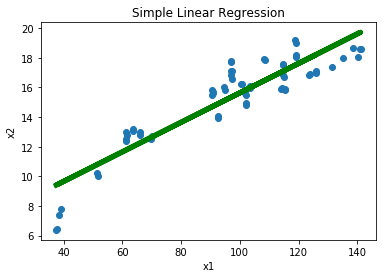

In [16]:
x=model.params[0] + model.params[1] * X[:,1]
plt.scatter(X[:,1], X[:,2])
plt.plot(X[:,1], x, color = 'g', linewidth=5.0)
plt.title("Simple Linear Regression")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Lets now fit a second order polynomial linear regression model  to our data \begin{align}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_2}x^2
\end{align} 

In [17]:
df['a'] = df[0]**2 #Adding a square term to the dataframe
#Next three lines to move output variable to the end of dataframe
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index(1)) #Remove 1 from list
df = df[cols+[1]] #Create new dataframe with columns in the order you want
X = np.array(df)    #Converting to numpy array to use further
X = np.insert(X, 0, 1, axis=1)   #Inserting a column of 1s for constant term

In [18]:
model = sm.OLS(X[:,3],X[:,:3]).fit()    #Fitting the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     293.6
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           2.15e-31
Time:                        11:09:11   Log-Likelihood:                -81.969
No. Observations:                  62   AIC:                             169.9
Df Residuals:                      59   BIC:                             176.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5254      1.104     -1.382      0.172      -3.734       0.683
x1             0.2791      0.026     10.858      0.000       0.228       0.331
x2            -0.0010      0.000     -7.088      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        2.658   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                1.608
Skew:                          -0.104   Prob(JB):                        0.448
Kurtosis:                       2.239   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The coefficients obtained are \begin{align}
\hat{\beta_0} = -1.5254 \\
\hat{\beta_1} = 0.2791 \\
\hat{\beta_2} = -0.0010
\end{align} 
### Lets now see what the sum of squared error is for this model 

In [19]:
ssr.append(model.ssr)
print('\033[1m'+ 'Sum of squared residuals= ' + '\033[0m',model.ssr)

Sum of squared residuals=  51.0810573979


## Let us now plot the fitted model overlaying the scatter plot of our original dataset

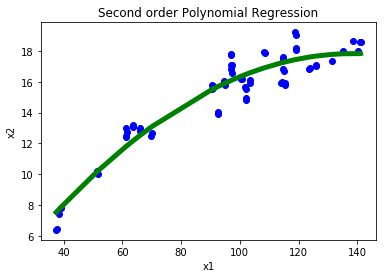

In [21]:
x=model.params[0] + model.params[1] * X[:,1] + model.params[2] * X[:,2]
plt.scatter(X[:,1], X[:,3], color = 'b')
plt.plot(np.sort(X[:,1]), np.sort(x), color = 'g', linewidth=5.0)
plt.title("Second order Polynomial Regression")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### The scond order polynomial regression model fits the data points much better and causes the sum of squared errors to fall considerably as well. From the plot and ssr, it seems like the second order fits the data better than the simple linear regression model
#### We will further examine higher order polynomials before comin to a conclusion about our preferred model

## Lets now fit a third order polynomial linear regression model  to our data \begin{align}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_2}x^2 + \hat{\beta_3}x^3
\end{align} 

In [22]:
df['b'] = df[0]**3                #Adding a square term to the dataframe
#Next three lines to move output variable to end of dataframe
cols = list(df.columns.values)    #Make a list of all of the columns in the df
cols.pop(cols.index(1))           #Remove 1 from list
df = df[cols+[1]]                 #Create new dataframe with columns in the order you want
X = np.array(df)                  #Converting to numpy array to use further
X = np.insert(X, 0, 1, axis=1)    #Inserting a column of 1s for constant term

In [23]:
model = sm.OLS(X[:,4],X[:,:4]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     223.4
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           8.10e-32
Time:                        11:13:03   Log-Likelihood:                -77.744
No. Observations:                  62   AIC:                             163.5
Df Residuals:                      58   BIC:                             172.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4058      2.901     -3.243      0.002     -15.212      -3.599
x1             0.5894      0.109      5.391      0.000       0.371       0.808
x2            -0.0047      0.001     -3.687      0.001      -0.007      -0.002
x3          1.348e-05   4.63e-06      2.910      0.005    4.21e-06    2.27e-05
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.377
Skew:                           0.186   Prob(JB):                        0.828
Kurtosis:                       2.914   Cond. No.                     3.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The coefficients obtained are \begin{align}
\hat{\beta_0} = -9.4058 \\
\hat{\beta_1} = 0.5894 \\
\hat{\beta_2} = -0.0047 \\
\hat{\beta_3} = 1.348e^{-05} \\
\end{align} 
### Lets now see what the sum of squared error is for this model 

In [25]:
ssr.append(model.ssr)
print('\033[1m'+ 'Sum of squared residuals= ' + '\033[0m',model.ssr)

Sum of squared residuals=  44.5729109596


## Let us now plot the fitted model overlaying the scatter plot of our original dataset

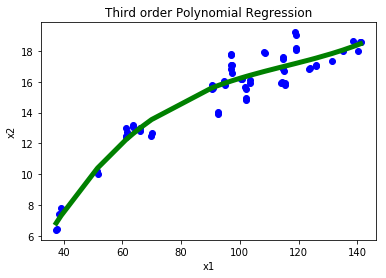

In [26]:
x=model.params[0] + model.params[1] * X[:,1] + model.params[2] * X[:,2] + model.params[3] * X[:,3]
plt.scatter(X[:,1], X[:,4], color = 'b')
plt.plot(np.sort(X[:,1]), np.sort(x), color = 'g', linewidth=5.0)
plt.title("Third order Polynomial Regression")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## The third order polynomial fits better but the sum of squared residuals has not reduced much. We will need to keep in mind the simplicity of our model before making any decision

## Similarly for fourth order polynomial

In [30]:
df['c'] = df[0]**4
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index(1)) #Remove 1 from list
df = df[cols+[1]] #Create new dataframe with columns in the order you want
X = np.array(df)
X = np.insert(X, 0, 1, axis=1)
model = sm.OLS(X[:,5],X[:,:5]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     165.1
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           1.23e-30
Time:                        11:38:22   Log-Likelihood:                -77.669
No. Observations:                  62   AIC:                             165.3
Df Residuals:                      57   BIC:                             176.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.2319      8.145     -1.502      0.139     -28.542       4.078
x1             0.7447      0.432      1.724      0.090      -0.120       1.610
x2            -0.0076      0.008     -0.948      0.347      -0.024       0.008
x3          3.684e-05    6.3e-05      0.585      0.561   -8.94e-05       0.000
x4         -6.556e-08   1.76e-07     -0.372      0.711   -4.19e-07    2.88e-07
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.435
Skew:                           0.190   Prob(JB):                        0.804
Kurtosis:                       2.842   Cond. No.                     1.19e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The coefficients obtained are \begin{align}
\hat{\beta_0} = -12.2319 \\
\hat{\beta_1} = 0.7447 \\
\hat{\beta_2} = -0.0076 \\
\hat{\beta_3} = 3.684e^{-05} \\
\hat{\beta_4} = -6.556e^{-08} 
\end{align} 
### Lets now see what the sum of squared error is for this model 

In [31]:
ssr.append(model.ssr)
print('\033[1m'+ 'Sum of squared residuals= ' + '\033[0m',model.ssr)

Sum of squared residuals=  44.4651118142


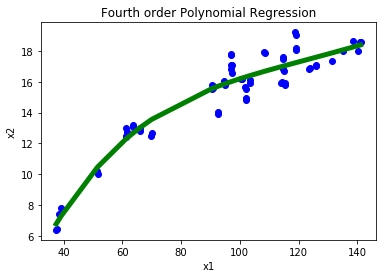

In [32]:
x=model.params[0] + model.params[1] * X[:,1] + model.params[2] * X[:,2] + model.params[3] * X[:,3] +model.params[4] * X[:,4]
plt.scatter(X[:,1], X[:,5], color = 'b')
plt.plot(np.sort(X[:,1]), np.sort(x), color = 'g', linewidth=5.0)
plt.title("Fourth order Polynomial Regression")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## The ssr for the fourth order polynomial has barely even changed.

## Let us now see the rss of different order models and derive a conclusion from that

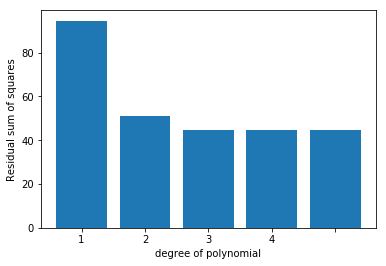

In [33]:
plt.bar(np.arange(len(ssr)),ssr)
plt.xticks(np.arange(len(ssr)),[i for i in range(1,5)])
plt.xlabel("degree of polynomial")
plt.ylabel("Residual sum of squares")
plt.show()

## It seems from the plots that 2nd degree of polynomial would be the best fit as increasing complexity further does not reduce the sum of squared errors much

# Logistic Regression

In [53]:
lm = linear_model.LogisticRegression(C=1e10)

In [54]:
X = np.array(df)
Y = X[:,4]
X = X[:,0].reshape((62,1))
model = lm.fit(X,Y)

ValueError: Unknown label type: 'continuous'

# Model does not fit the data as logistic regression is used when output variable lies between 0 and 1. But here the output variable has values above 1